In [1]:
import json
import pandas as pd
import numpy as np
import sklearn
from zipfile import ZipFile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
data_folder = Path('data')
train_zip = 'train.csv'
test_zip = 'test.csv'

In [4]:
def read_dataset(file_path):
    data = pd.read_csv(file_path)
    return data

In [5]:
df_train = read_dataset(data_folder.joinpath(train_zip))
df_test = read_dataset(data_folder.joinpath(test_zip))


In [6]:
print('Number of training examples: %s\n Number of testing examples: %s' %(len(df_train), len(df_test)))

Number of training examples: 250
 Number of testing examples: 19750


In [7]:
df_train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [8]:
df_test.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,252,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,253,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,254,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010


This problem is unique as there are only 250 data points and 300 features. As the name suggests we will have to look for minimum overfitting.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [10]:
df_test.drop('id', axis=1)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,-1.380,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,0.584,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,0.714,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,-0.205,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,-0.400,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19745,0.630,-0.244,-1.175,0.948,1.254,-1.297,-1.317,1.470,-1.958,0.543,...,-1.171,0.902,-0.006,-0.893,0.238,1.157,0.895,-1.760,-2.381,0.901
19746,-0.963,0.573,-0.482,-0.519,-0.433,-2.687,0.027,0.500,1.498,0.963,...,1.366,-0.262,1.583,2.449,-1.081,-0.199,-1.342,-1.732,0.263,-0.337
19747,-1.564,0.010,-1.097,0.434,-0.271,-1.777,0.184,-0.916,-0.527,1.307,...,-0.712,0.212,0.613,0.514,0.440,0.640,0.175,0.825,-0.809,1.653
19748,0.196,-3.164,0.903,0.638,0.615,0.295,0.580,0.398,-0.510,0.314,...,-0.406,1.489,1.571,-0.076,-0.438,0.755,1.812,0.770,-0.870,0.160


In [27]:
def submission(model, df_test, filename):
    test_pred = model.predict_proba(df_test.drop(labels=['id', 'target'], axis=1, errors='ignore'))[:, 1]
    df_test['target'] = test_pred
    df_test[['id','target']].to_csv('submissions/'+filename, index=False)
    return True

In [12]:
def plot_ROC_curve(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# Base model LR
Lets try Logistic Regression as the first model

In [13]:
clf_pipeline = Pipeline([
#     ('scale', StandardScaler(with_mean=False)),
#     ('svd', TruncatedSVD(n_components=1000)),
    ('clf', LogisticRegression(max_iter=100))
])

In [14]:
param_grid = {
    'clf__C': [0.1, 0.25, 0.5, 0.75],
    'clf__max_iter': [100, 500],
}

In [15]:
grid_clf = GridSearchCV(estimator=clf_pipeline, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=2,
            refit=True, return_train_score=True, verbose=100)

In [16]:
grid_clf.fit(df_train.iloc[:, 2:], df_train['target'])

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(300, 250), dtype=float64).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(250,), dtype=float64).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(300, 250), dtype=float64).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(250,), dtype=float64).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(300, 250), dtype=float64).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(250,), dtype=float64).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(300,), dtype=object

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                                 

In [17]:
grid_clf.best_score_

0.6741820626091726

In [18]:
grid_clf.best_estimator_

Pipeline(memory=None,
         steps=[('clf',
                 LogisticRegression(C=0.25, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [19]:
model = grid_clf.best_estimator_

In [97]:
def roc_curve_with_model(model, X, y):
    y_score = model.decision_function(X)
    fpr, tpr, threshold  = roc_curve(y_true=y, y_score=y_score)
    plot_ROC_curve(fpr=fpr, tpr=tpr)
    return 1

In [20]:
X = df_train.iloc[:, 2:]
y_score = model.decision_function(X)
y_true = df_train['target']

In [21]:
fpr, tpr, _  = roc_curve(y_true=y_true, y_score=y_score)

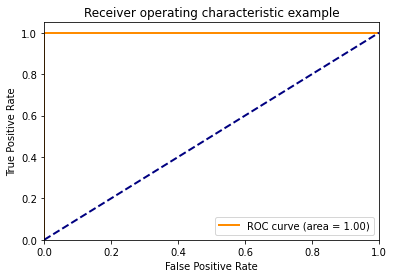

In [22]:
plot_ROC_curve(fpr=fpr, tpr=tpr)

In [23]:
confusion_matrix(y_pred=model.predict(X), y_true=y_true)

array([[183,   0],
       [  0,  67]], dtype=int64)

In [28]:
submission(model, df_test, 'LR_c25.csv')

True

# LR + SVD

In [29]:
clf_pipeline = Pipeline([
#     ('scale', StandardScaler(with_mean=False)),
    ('svd', TruncatedSVD(n_components=1000)),
    ('clf', LogisticRegression(max_iter=100))
])

In [30]:
param_grid = {
    'clf__C': [0.1,0.2, 0.3, 0.5],
    'clf__max_iter': [100, 500],
    'svd__n_components': [100, 200, 300]
}

In [31]:
grid_clf = GridSearchCV(estimator=clf_pipeline, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=2,
            refit=True, return_train_score=True, verbose=100)

In [32]:
grid_clf.fit(df_train.iloc[:, 2:], df_train['target'])

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(300, 250), dtype=float64).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(250,), dtype=float64).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(300, 250), dtype=float64).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(250,), dtype=float64).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(300, 250), dtype=float64).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(250,), dtype=float64).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(300,), dtype=objec

Pickling array (shape=(300, 250), dtype=float64).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(250,), dtype=float64).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  26 out of  48 | elapsed:    0.7s remaining:    0.6s
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(300, 250), dtype=float64).[Parallel(n_jobs=-1)]: Done  28 out of  48 | elapsed:    0.7s remaining:    0.5s

Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(250,), dtype=float64).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(125,), dtype=int32).
Pickling array (shape=(300,), dtype=object).
Pickling array (shape=(300, 250), dtype=float64).
Pickling array (shape=(300,), dtype=object).
Pickling array (sha

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svd',
                                        TruncatedSVD(algorithm='randomized',
                                                     n_components=1000,
                                                     n_iter=5,
                                                     random_state=None,
                                                     tol=0.0)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                             

In [33]:
grid_clf.best_estimator_

Pipeline(memory=None,
         steps=[('svd',
                 TruncatedSVD(algorithm='randomized', n_components=200,
                              n_iter=5, random_state=None, tol=0.0)),
                ('clf',
                 LogisticRegression(C=0.2, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [34]:
grid_clf.best_score_

0.6741851498884747

This model also yields the same best_score_ hence no need to submit

# XGBoost Pipeline

In [35]:
import xgboost

In [36]:
xgb_params = {'objective':'binary:logistic', 'max_depth': 20, 'n_estimators':150, 'n_jobs': -1, 'colsample_bytree': 0.5, 
             'print.every.n': 10, 'reg_lambda': 1, 'reg_alpha': 1}
xgb = xgboost.XGBClassifier(**xgb_params)

In [37]:
xgb_grid = {
    'max_depth': [15, 20],
    'reg_lambda': [1, 3, 5, 7, 10],
    'reg_alpha': [0.5, 1, 3]
}

xgb_clf = GridSearchCV(estimator=xgb, param_grid=xgb_grid, cv=2, verbose=1, scoring='roc_auc')

In [38]:
xgb_clf.fit(X, y_true)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   21.6s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=20, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimato...
                                     print.every.n=10, random_state=None,
                                     reg_alpha=1, reg_lambda=1,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,
              

In [39]:
xgb_clf.best_params_

{'max_depth': 15, 'reg_alpha': 1, 'reg_lambda': 5}

In [40]:
xgb_clf.best_score_

0.6380232086753825

In [42]:
submission(xgb_clf.best_estimator_, df_test, filename='XGB.csv')

True

### Split test train

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_true, test_size=0.2)

In [172]:
xgb_params = {'objective':'binary:logistic', 'max_depth': 5, 'n_estimators':10, 'n_jobs': -1, 'colsample_bytree': 0.5, 
             'print.every.n': 10, 'reg_lambda': 10, 'reg_alpha': 20}
xgb = xgboost.XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='auc')

[0]	validation_0-auc:0.74357	validation_1-auc:0.45395
[1]	validation_0-auc:0.83216	validation_1-auc:0.44956
[2]	validation_0-auc:0.87806	validation_1-auc:0.48136
[3]	validation_0-auc:0.88495	validation_1-auc:0.50110
[4]	validation_0-auc:0.88740	validation_1-auc:0.51316
[5]	validation_0-auc:0.89128	validation_1-auc:0.52632
[6]	validation_0-auc:0.90972	validation_1-auc:0.54057
[7]	validation_0-auc:0.91567	validation_1-auc:0.52193
[8]	validation_0-auc:0.91624	validation_1-auc:0.53399
[9]	validation_0-auc:0.91687	validation_1-auc:0.54057


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', print.every.n=10, random_state=0,
              reg_alpha=20, reg_lambda=10, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)